In [ ]:
# EDA
import pandas as pd
import numpy as np

# Data Preprocessing 
from sklearn import preprocessing

# Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
# Recommender System Imps
# Content Based Filtering 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
# Collaborative Based Filtering 
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

# To work with text data 
import re
import string

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/project/dataset1.csv')
df2=pd.read_csv('/content/drive/MyDrive/project/ratings.csv')

In [ ]:
df.head()

,Food_ID,Name,C_Type,Veg_Non,Describe
0,1,summer squash salad,Healthy Food,veg,"white balsamic vinegar, lemon juice, lemon rin..."
1,2,chicken minced salad,Healthy Food,non-veg,"olive oil, chicken mince, garlic (minced), oni..."
2,3,sweet chilli almonds,Snack,veg,"almonds whole, egg white, curry leaves, salt, ..."
3,4,tricolour salad,Healthy Food,veg,"vinegar, honey/sugar, soy sauce, salt, garlic ..."
4,5,christmas cake,Dessert,veg,"christmas dry fruits (pre-soaked), orange zest..."


In [ ]:
# No of dishes in my dataset
len(list(df['Name'].unique()))


400

In [ ]:
df['C_Type'].unique() # Categorical Data 

array(['Healthy Food', 'Snack', 'Dessert', 'Japanese', 'Indian', 'French',
       'Mexican', 'Italian', 'Chinese', 'Beverage', 'Thai', 'Korean',
       ' Korean', 'Vietnames', 'Nepalese', 'Spanish'], dtype=object)

In [ ]:
df['Veg_Non'].unique() # Categorical Data 

array(['veg', 'non-veg'], dtype=object)

In [ ]:
len(df) 

400

In [ ]:
df.shape

(400, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Food_ID   400 non-null    int64 
 1   Name      400 non-null    object
 2   C_Type    400 non-null    object
 3   Veg_Non   400 non-null    object
 4   Describe  400 non-null    object
dtypes: int64(1), object(4)
memory usage: 15.8+ KB


In [ ]:
# Let's make a function to remove all the punctuation from the "Describe" column
def text_cleaning(text):
    text  = "".join([char for char in text if char not in string.punctuation])    
    return text

In [ ]:
# Let's clean the text 
df['Describe'] = df['Describe'].apply(text_cleaning)
# Let's see if that worked...
df.head()

,Food_ID,Name,C_Type,Veg_Non,Describe
0,1,summer squash salad,Healthy Food,veg,white balsamic vinegar lemon juice lemon rind ...
1,2,chicken minced salad,Healthy Food,non-veg,olive oil chicken mince garlic minced onion sa...
2,3,sweet chilli almonds,Snack,veg,almonds whole egg white curry leaves salt suga...
3,4,tricolour salad,Healthy Food,veg,vinegar honeysugar soy sauce salt garlic clove...
4,5,christmas cake,Dessert,veg,christmas dry fruits presoaked orange zest lem...


In [ ]:
# Are there any duplicate data ?
df.duplicated().sum()

0

In [ ]:
# Are there any null values?
df.isnull().sum()

Food_ID     0
Name        0
C_Type      0
Veg_Non     0
Describe    0
dtype: int64

In [ ]:
# General Description 
df.describe()

,Food_ID
count,400.000000
mean,200.500000
std,115.614301
min,1.000000
25%,100.750000
50%,200.500000
75%,300.250000
max,400.000000


In [ ]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['Describe'])
tfidf_matrix.shape

(400, 1261)

In [ ]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim

array([[1.        , 0.16228366, 0.13001124, ..., 0.1286286 , 0.04277223,
        0.09993639],
       [0.16228366, 1.        , 0.06799336, ..., 0.14878001, 0.05688681,
        0.16917639],
       [0.13001124, 0.06799336, 1.        , ..., 0.03291577, 0.11795401,
        0.01834168],
       ...,
       [0.1286286 , 0.14878001, 0.03291577, ..., 1.        , 0.        ,
        0.10087579],
       [0.04277223, 0.05688681, 0.11795401, ..., 0.        , 1.        ,
        0.        ],
       [0.09993639, 0.16917639, 0.01834168, ..., 0.10087579, 0.        ,
        1.        ]])

In [ ]:
# Just considering the Food names from the dataframe
indices = pd.Series(df.index, index=df['Name']).drop_duplicates()
indices

Name
summer squash salad                                          0
chicken minced salad                                         1
sweet chilli almonds                                         2
tricolour salad                                              3
christmas cake                                               4
                                                          ... 
Kimchi Toast                                               395
Tacos de Gobernador (Shrimp, Poblano, and Cheese Tacos)    396
Melted Broccoli Pasta With Capers and Anchovies            397
Lemon-Ginger Cake with Pistachios                          398
Rosemary Roasted Vegetables                                399
Length: 400, dtype: int64

In [ ]:
# The main recommender code!
def get_recommendations(title, cosine_sim=cosine_sim):
    
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 5 most similar food
    sim_scores = sim_scores[1:6]
    
    food_indices = [i[0] for i in sim_scores]
    return df['Name'].iloc[food_indices]

In [ ]:
# This is the first model - simple variation 
get_recommendations('tricolour salad')

103             chilli chicken
1         chicken minced salad
27     vegetable som tam salad
282          veg hakka noodles
166             veg fried rice
Name: Name, dtype: object

In [ ]:
# Including all features that will help in recommending better
features = ['C_Type','Veg_Non', 'Describe']

In [ ]:
# Soup represents a mixture of elements 
# Similarly, I am making one column that will have all the important features 
# I am simply concatenating the strings 

def create_soup(x):
    return x['C_Type'] + " " + x['Veg_Non'] + " " + x['Describe']

# Using the soup(), I am creating the column for the dataframe df
df['soup'] = df.apply(create_soup, axis=1)

# Checking out if that worked!
df.head()

,Food_ID,Name,C_Type,Veg_Non,Describe,soup
0,1,summer squash salad,Healthy Food,veg,white balsamic vinegar lemon juice lemon rind ...,Healthy Food veg white balsamic vinegar lemon ...
1,2,chicken minced salad,Healthy Food,non-veg,olive oil chicken mince garlic minced onion sa...,Healthy Food non-veg olive oil chicken mince g...
2,3,sweet chilli almonds,Snack,veg,almonds whole egg white curry leaves salt suga...,Snack veg almonds whole egg white curry leaves...
3,4,tricolour salad,Healthy Food,veg,vinegar honeysugar soy sauce salt garlic clove...,Healthy Food veg vinegar honeysugar soy sauce ...
4,5,christmas cake,Dessert,veg,christmas dry fruits presoaked orange zest lem...,Dessert veg christmas dry fruits presoaked ora...


In [ ]:
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df['soup'])

In [ ]:
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

# Reseting the index and pulling out the names of the food alone from the df dataframe
df = df.reset_index()
indices = pd.Series(df.index, index=df['Name'])

# Let's see the names of the food pulled out
display(indices)

Name
summer squash salad                                          0
chicken minced salad                                         1
sweet chilli almonds                                         2
tricolour salad                                              3
christmas cake                                               4
                                                          ... 
Kimchi Toast                                               395
Tacos de Gobernador (Shrimp, Poblano, and Cheese Tacos)    396
Melted Broccoli Pasta With Capers and Anchovies            397
Lemon-Ginger Cake with Pistachios                          398
Rosemary Roasted Vegetables                                399
Length: 400, dtype: int64

In [ ]:
# This is the second model - using count vectorizer
get_recommendations('tricolour salad', cosine_sim2)

1                         chicken minced salad
103                             chilli chicken
27                     vegetable som tam salad
177                        oats shallots pulao
69     shepherds salad (tamatar-kheera salaad)
Name: Name, dtype: object

In [ ]:
get_recommendations('christmas cake')

378      Grilled Chicken with Almond and Garlic Sauce
234                                  whole wheat cake
393    Fig and Sesame Tart with Cardamom Orange Cream
227                         chocolate chip cheesecake
250                            lemon poppy seed cake 
Name: Name, dtype: object

In [ ]:
#second model : see the difference
get_recommendations('christmas cake', cosine_sim2)

250    lemon poppy seed cake 
228       chocolate lava cake
198     lemon poppy seed cake
235                 plum cake
233     cinnamon star cookies
Name: Name, dtype: object

In [ ]:
#Collaborative Filtering
# Importing the ratings file
rating = pd.read_csv('/content/drive/MyDrive/project/ratings.csv')
rating.head()

,User_ID,Food_ID,Rating
0,1.0,88.0,4.0
1,1.0,46.0,3.0
2,1.0,24.0,5.0
3,1.0,25.0,4.0
4,2.0,49.0,1.0


In [ ]:
#Checking the shape
rating.shape

(512, 3)

In [ ]:
# I actually saw the data earlier and found that the last row had no values 
# Let's see 
rating.tail()

,User_ID,Food_ID,Rating
507,99.0,22.0,1.0
508,100.0,24.0,10.0
509,100.0,233.0,10.0
510,100.0,29.0,7.0
511,NaN,NaN,NaN


In [ ]:
# Removing the last row 
rating = rating[:511]
rating.tail()

,User_ID,Food_ID,Rating
506,99.0,65.0,7.0
507,99.0,22.0,1.0
508,100.0,24.0,10.0
509,100.0,233.0,10.0
510,100.0,29.0,7.0


In [ ]:
# So, now there should not be any null value 
rating.isnull().sum()

User_ID    0
Food_ID    0
Rating     0
dtype: int64

In [ ]:
# Making a dataframe that has food ID and the number of ratings
food_rating = rating.groupby(by = 'Food_ID').count()
food_rating = food_rating['Rating'].reset_index().rename(columns={'Rating':'Rating_count'})
food_rating

,Food_ID,Rating_count
0,1.0,2
1,2.0,3
2,3.0,2
3,4.0,2
4,5.0,6
...,...,...
304,305.0,1
305,306.0,1
306,307.0,1
307,308.0,1


In [ ]:
# Food rating dataframe description
food_rating['Rating_count'].describe()

count    309.000000
mean       1.653722
std        1.107748
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        7.000000
Name: Rating_count, dtype: float64

In [ ]:
# The user rating dataframe shows the number of ratings given with respect to the user
user_rating = rating.groupby(by='User_ID').count()
user_rating = user_rating['Rating'].reset_index().rename(columns={'Rating':'Rating_count'})
user_rating

,User_ID,Rating_count
0,1.0,4
1,2.0,4
2,3.0,9
3,4.0,6
4,5.0,6
...,...,...
95,96.0,6
96,97.0,7
97,98.0,7
98,99.0,6


In [ ]:
# User rating dataframe description 
user_rating["Rating_count"].describe()

count    100.000000
mean       5.110000
std        2.352282
min        1.000000
25%        3.000000
50%        5.000000
75%        7.000000
max       11.000000
Name: Rating_count, dtype: float64

In [ ]:
# Ultimate Table
rating_matrix = rating.pivot_table(index='Food_ID',columns='User_ID',values='Rating').fillna(0)
rating_matrix.head()

User_ID,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0
Food_ID,,,,,,,,,,,,,,,,,,,,,
1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,7.0,0.0,0.0


In [ ]:
# Shape of rating_matrix
rating_matrix.shape

(309, 100)

In [ ]:
csr_rating_matrix =  csr_matrix(rating_matrix.values)
print(csr_rating_matrix)

  (0, 48)	5.0
  (0, 70)	10.0
  (1, 8)	3.0
  (1, 21)	5.0
  (1, 38)	10.0
  (2, 76)	1.0
  (2, 88)	7.0
  (3, 40)	6.0
  (3, 89)	6.0
  (4, 27)	10.0
  (4, 38)	10.0
  (4, 72)	7.0
  (4, 87)	3.0
  (4, 93)	2.0
  (4, 97)	7.0
  (5, 42)	10.0
  (5, 48)	6.0
  (5, 76)	6.0
  (5, 91)	1.0
  (6, 16)	4.0
  (6, 47)	5.0
  (6, 62)	9.0
  (6, 69)	8.0
  (6, 70)	8.0
  (7, 4)	6.0
  :	:
  (284, 30)	9.0
  (285, 80)	6.0
  (286, 24)	3.0
  (287, 54)	3.0
  (288, 55)	9.0
  (289, 31)	7.0
  (290, 15)	1.0
  (291, 2)	8.0
  (292, 95)	5.0
  (293, 41)	4.0
  (294, 43)	10.0
  (295, 41)	10.0
  (296, 94)	5.0
  (297, 55)	4.0
  (298, 2)	1.0
  (299, 28)	9.0
  (300, 53)	1.0
  (301, 77)	5.0
  (302, 63)	6.0
  (303, 29)	1.0
  (304, 55)	9.0
  (305, 79)	8.0
  (306, 70)	1.0
  (307, 96)	3.0
  (308, 31)	5.0


In [ ]:
# Using cosine similarity to find nearest neigbours 
recommender = NearestNeighbors(metric='cosine')
recommender.fit(csr_rating_matrix)

NearestNeighbors(metric='cosine')

In [ ]:
# The main recommender code!
def Get_Recommendations(title):
    user= df[df['Name']==title]
    user_index = np.where(rating_matrix.index==int(user['Food_ID']))[0][0]
    user_ratings = rating_matrix.iloc[user_index]

    reshaped = user_ratings.values.reshape(1,-1)
    distances, indices = recommender.kneighbors(reshaped,n_neighbors=16)
    
    nearest_neighbors_indices = rating_matrix.iloc[indices[0]].index[1:]
    nearest_neighbors = pd.DataFrame({'Food_ID': nearest_neighbors_indices})
    
    result = pd.merge(nearest_neighbors,df,on='Food_ID',how='left')
    
    return result.head()

In [ ]:
# Get recommendations with this function 
Get_Recommendations('spicy chicken curry')


,Food_ID,Name,C_Type,Veg_Non,Describe
0,227.0,cinnamon oatmeal pancakes,Healthy Food,veg,rolled oats buttermilk divided whole wheat flo...
1,250.0,jerk chicken,Indian,non-veg,chicken legs lime halved jerk seasoning powder...
2,70.0,shepherds salad (tamatar-kheera salaad),Healthy Food,veg,1 cucumber peeled and chopped onion tomato gre...
3,44.0,andhra pan fried pomfret,Indian,veg,white pomfret fish sunflower refined ooil red ...
4,4.0,tricolour salad,Healthy Food,veg,vinegar honeysugar soy sauce salt garlic clove...


USING NUERAL NETWORK

In [ ]:
df.head()

,Food_ID,Name,C_Type,Veg_Non,Describe
0,1,summer squash salad,Healthy Food,veg,white balsamic vinegar lemon juice lemon rind ...
1,2,chicken minced salad,Healthy Food,non-veg,olive oil chicken mince garlic minced onion sa...
2,3,sweet chilli almonds,Snack,veg,almonds whole egg white curry leaves salt suga...
3,4,tricolour salad,Healthy Food,veg,vinegar honeysugar soy sauce salt garlic clove...
4,5,christmas cake,Dessert,veg,christmas dry fruits presoaked orange zest lem...


In [ ]:
df2.head()

,User_ID,Food_ID,Rating
0,1.0,88.0,4.0
1,1.0,46.0,3.0
2,1.0,24.0,5.0
3,1.0,25.0,4.0
4,2.0,49.0,1.0


In [ ]:
from sklearn.preprocessing import LabelEncoder
df_keras = df2.copy()
user_encode = LabelEncoder()

df_keras['Food_ID'] = user_encode.fit_transform(df_keras['Food_ID'].values)
n_food = df_keras['Food_ID'].nunique()

item_encode = LabelEncoder()

df_keras['User_ID'] = item_encode.fit_transform(df_keras['User_ID'].values)
n_users = df_keras['User_ID'].nunique()

df_keras['Rating'] = df_keras['Rating']

In [ ]:
min_rating = min(df_keras['Rating'])
max_rating = max(df_keras['Rating'])

print(n_users, n_food, min_rating, max_rating)

101 310 1.0 10.0


In [ ]:
from sklearn.model_selection import train_test_split

X = df_keras[['User_ID', 'Food_ID']].values
y = df_keras['Rating'].values

X_train_keras, X_test_keras, y_train_keras, y_test_keras = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_keras.shape, X_test_keras.shape, y_train_keras.shape, y_test_keras.shape

((409, 2), (103, 2), (409,), (103,))

In [ ]:
n_factors = 50

X_train_array = [X_train_keras[:, 0], X_train_keras[:, 1]]
X_test_array = [X_test_keras[:, 0], X_test_keras[:, 1]]

In [ ]:
X_train_array, X_test_array

([array([ 59,  61,  32,  51,  96,  35,  49,  66,  21,  74,  61,  88,  85,
          67,  15,  84,  13,  87,   2,  40,  34,  75,   3,  97,  62,   9,
          52,  95,  82,  30,   4,  49,   7,  58,  78,  88,  53,  24,  61,
           5,  20,  48,  41,  79,   9,  75,   4,   3,  36,  11,  53,  80,
          16,  58,  77,   4,  50,  54,  69,   1,  21,   7,  35,   2,  93,
          68,   0,  44,  71,  10,  20,  78,  79,   5,  51,  55,   4,   1,
          35,  91,  19,   6,  30,  94,  21,  20,  49,  33,  83,  66,  27,
          71,  81,  40,  60,  96,  88,  27,  69,  11,  68,  31,  98,  85,
          43,  36,  14,  20,  81,  28,  16,  30,  93,  47,  14,  18,  31,
          31,  37,  46,  13,  58,  44,  94,  21,  72,  81,  48,  68,  78,
          62,  49,  93,  79,  74,  52,   6,  37,  26,  69,  96,  53,  69,
           9,  90,  20,  16,  79,   1,  69,  66,  65,  30,  29,  73,   6,
          60,  37,  86,  28,  76,  28,  58,  95,  23,  70,  17,  27,  45,
          77,  17,  67,  23,  35,  38,

In [ ]:
from keras.layers import Add, Activation, Lambda
from keras.models import Model
from keras.layers import Input, Reshape, Dot
from keras.layers import Embedding
from keras.optimizers import Adam
from keras.regularizers import l2

class EmbeddingLayer:
    def __init__(self, n_items, n_factors):
        self.n_items = n_items
        self.n_factors = n_factors
    def __call__(self, x):
        x = Embedding(self.n_items, self.n_factors, embeddings_initializer='he_normal', embeddings_regularizer=l2(1e-6))(x)
        x = Reshape((self.n_factors,))(x)
        
        return x


In [ ]:
def Recommender(n_users, n_rests, n_factors, min_rating, max_rating):
    user = Input(shape=(1,))
    u = EmbeddingLayer(n_users, n_factors)(user)
    ub = EmbeddingLayer(n_users, 1)(user)
    
    food = Input(shape=(1,))
    m = EmbeddingLayer(n_rests, n_factors)(food)
    mb = EmbeddingLayer(n_rests, 1)(food)   
    
    x = Dot(axes=1)([u, m])
    x = Add()([x, ub, mb])
    x = Activation('sigmoid')(x)
    x = Lambda(lambda x: x * (max_rating - min_rating) + min_rating)(x)

    model = Model(inputs=[user, food], outputs=x)
    opt = Adam(lr=0.001)
    model.compile(loss='mean_squared_error', optimizer=opt)  
    
    return model

In [ ]:
keras_model = Recommender(n_users, n_food, n_factors, min_rating, max_rating)
keras_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding (Embedding)          (None, 1, 50)        5050        ['input_1[0][0]']                
                                                                                                  
 embedding_2 (Embedding)        (None, 1, 50)        15500       ['input_2[0][0]']                
                                                                                              

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
keras_model.fit(x=X_train_array, y=y_train_keras, batch_size=64,\
                          epochs=5, verbose=1, validation_data=(X_test_array, y_test_keras))

Epoch 1/5
7/7 [==============================] - 0s 27ms/step - loss: nan - val_loss: nan
Epoch 2/5
7/7 [==============================] - 0s 15ms/step - loss: nan - val_loss: nan
Epoch 3/5
7/7 [==============================] - 0s 18ms/step - loss: nan - val_loss: nan
Epoch 4/5
7/7 [==============================] - 0s 15ms/step - loss: nan - val_loss: nan
Epoch 5/5
7/7 [==============================] - 0s 13ms/step - loss: nan - val_loss: nan


In [ ]:
# prediction
predictions = keras_model.predict(X_test_array)

4/4 [==============================] - 0s 3ms/step


In [ ]:
# create the df_test table with prediction results
df_test = pd.DataFrame(X_test_keras[:,0])
df_test.rename(columns={0: "USER"}, inplace=True)
df_test['FOODID'] = X_test_keras[:,1]
df_test['RATING'] = y_test_keras
df_test["PREDICTED RATING"] = predictions
df_test.head()

,USER,FOODID,RATING,PREDICTED RATING
0,56,77,8.0,5.360991
1,97,34,4.0,4.591008
2,85,23,1.0,5.577315
3,30,149,9.0,6.134864
4,97,4,7.0,5.219115


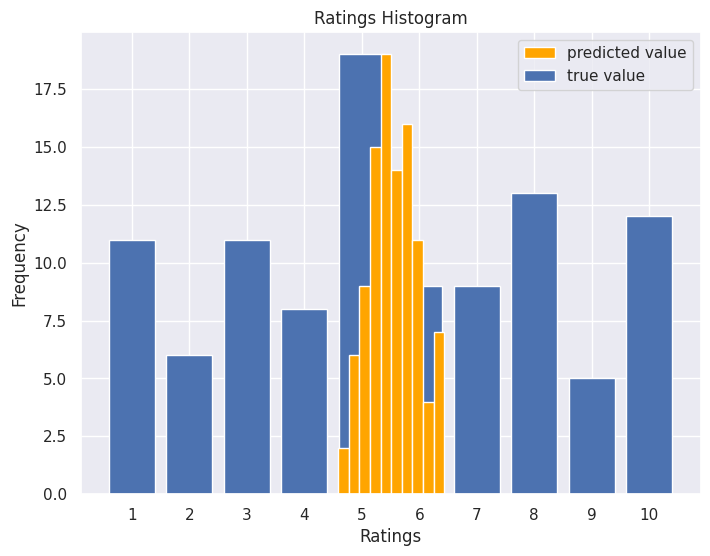

In [ ]:
# Plotting the distribution of actual and predicted stars
import matplotlib.pyplot as plt
import seaborn as sns
values, counts = np.unique(df_test['RATING'], return_counts=True)

plt.figure(figsize=(8,6))
plt.bar(values, counts, tick_label=['1','2','3','4','5','6','7','8','9','10'], label='true value')
plt.hist(predictions, color='orange', label='predicted value')
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.title("Ratings Histogram")
plt.legend()
plt.show()